In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os as os
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import os
import gseapy
import re
import glob

from matplotlib import colors
colors2 = plt.cm.Reds(np.linspace(0, 0.5, 100))
colors3 = plt.cm.Blues_r(np.linspace(0.4,1,200))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb).reversed()

In [2]:
proj_path='C:/Users/joshu/Desktop/GSEA heatmaps/HvCPIcolitis CSVs GSEA/'
os.chdir(proj_path)

dir_list = glob.glob('*.csv')
#dir_list = os.listdir(proj_path)
dir_list 

#Read in csv and set up empty varaible/list for use below
clusters = [re.sub('\.*.csv$', '', i) for i in dir_list]
enr_up = [[] for i in range(0, len(clusters))]
enr_dw = [[] for i in range(0, len(clusters))]
en_res_up = list()
col_names_up = []
en_res_dw = list()
col_names_dw = []

#For each cluster, separate the DEG into up and down regulated and filter the csv into threshold you would like, like pval < 0.05 and log2FC <1
#Remember, you need to have at least 2 DEG per cell type to run GSEA enrichment
for i in range (0,len(clusters)):
    cluster = clusters[i]           
    degs = pd.read_csv(cluster+'.csv',delimiter=',')
    degs_sig = degs[degs.pval < 0.05]
    degs_up = degs_sig[degs_sig.log2fc > 1]
    degs_dw = degs_sig[degs_sig.log2fc < -1]
    #degs_up = degs[degs.log2fc > 0]
    #degs_dw = degs[degs.log2fc < 0]
    

    if degs_up.shape[0] >=2:
            enr_up[i] = gseapy.enrichr(degs_up.gene,
                            gene_sets='Reactome_2022',
                            outdir=None)
            #Append all the up regulated genes GSEA output for each cell type into a list
            if enr_up[i]:
                en_res_up.append(enr_up[i].res2d)
                col_names_up.append(np.unique(clusters)[i])
                #Add the below code to output genes for each term
            
    if degs_dw.shape[0] >=2:
            enr_dw[i] = gseapy.enrichr(degs_dw.gene,
                        gene_sets='Reactome_2022',
                        outdir=None)
            #Append all the down regulated genes GSEA output for each cell type into a list
            if enr_dw[i]:
                en_res_dw.append(enr_dw[i].res2d)
                col_names_dw.append(np.unique(clusters)[i])
                #Add the below code to output genes for each term
                
keep_cols = ['Adjusted P-value']  #the column you want to plot: pval, gene number etc.



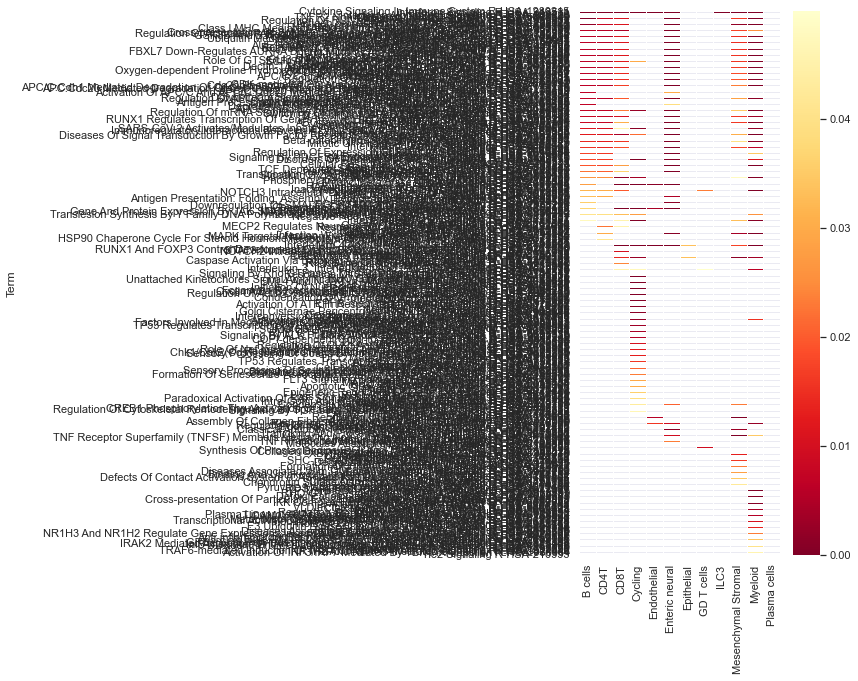

In [3]:
###Identify all significantly upregulated pathways
#Change the combined pathway list into a dataframe and plot up regulated genes pathway for each cell type
df_up = pd.DataFrame()
for cluster_up in en_res_up:
    tab_up = cluster_up
    #Can select what you want to plot and how you want to filter them
    tab_up.index = cluster_up['Term']
    tab_sub_up = tab_up[tab_up['Adjusted P-value']<0.05]
    df_up = pd.concat([df_up, tab_sub_up[keep_cols]], axis=1)

df_up.columns = col_names_up


df_up = df_up[df_up.columns].astype(float)
#you can print the combined GSEA term dataframe to check which term you want to plot and can subset here, i.e first row, 3th, 5th and 8th row
df_up
#df_up_subset = df_up.iloc[[0,3,5,8]]
#df_up_subset


og=plt.cm.get_cmap('YlOrRd')
go=og.reversed()

sns.set(style="dark")
plt.figure(figsize = (4.5,10))
g = sns.heatmap(df_up[col_names_up], annot=False, linewidths=.5, yticklabels=True, xticklabels=True, cmap=go, 
                #row_cluster=True, col_cluster=True, 
                annot_kws={"size": 8})

a=g.get_figure()
a.savefig ('GSEA_Reactome_2022_UP.pdf',bbox_inches="tight")

plt.show()



In [5]:
df_up.to_csv('C:/Users/joshu/Desktop/HvCPIcolitis_Reactome.csv')

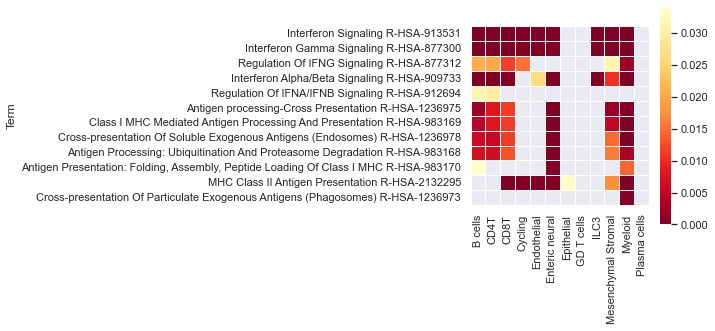

In [26]:
###manually plot significant IFN related pathways
#Change the combined pathway list into a dataframe and plot up regulated genes pathway for each cell type
df_up = pd.DataFrame()
for cluster_up in en_res_up:
    tab_up = cluster_up
    #Can select what you want to plot and how you want to filter them
    tab_up.index = cluster_up['Term']
    tab_sub_up = tab_up[tab_up['Adjusted P-value']<0.05]
    df_up = pd.concat([df_up, tab_sub_up[keep_cols]], axis=1)

df_up.columns = col_names_up

df_up = df_up[df_up.columns].astype(float)
#you can print the combined GSEA term dataframe to check which term you want to plot and can subset here, i.e first row, 3th, 5th and 8th row
#df_up
df_up_subset = df_up.iloc[[1,4,130,3,150,10,14,17,76,156,195,408]]
df_up_subset


sns.set(style="dark")
plt.figure(figsize = (4,4))
g = sns.heatmap(df_up_subset[col_names_up], annot=False, linewidths=.5, yticklabels=True, xticklabels=True, cmap='YlOrRd_r', 
                square=True,
                #row_cluster=True, col_cluster=True, 
                annot_kws={"size": 8})

plt.show()

a=g.get_figure()
a.savefig ('C:/Users/joshu/Desktop/HvCPIcolitis_GSEA_IFNG.pdf',bbox_inches="tight")